# Iris Dataset

I will be beginning a raw approach to the dataset i.e no external help and try to build up.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

In [2]:
data = pd.read_csv('iris.data.txt' , header = None)
data.columns = ['Sepal-Length','Sepal-Width','Petal-Length','Petal-Width','Class']

Visualising the data

In [3]:
data.head(10)

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data.shape

(150, 5)

There are 150 rows and 5 columns.

According to the dataset description, the columns stand for - 
1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm
5. Class - Sentosa, Virgicolour, Virginica

In [5]:
data['Class'].unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [6]:
data.describe()

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


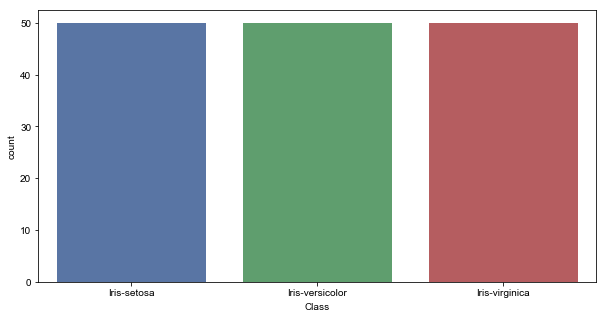

In [7]:
plt.subplots(figsize=(10,5))
sns.set(style="darkgrid")
sns.countplot(x='Class', data=data)

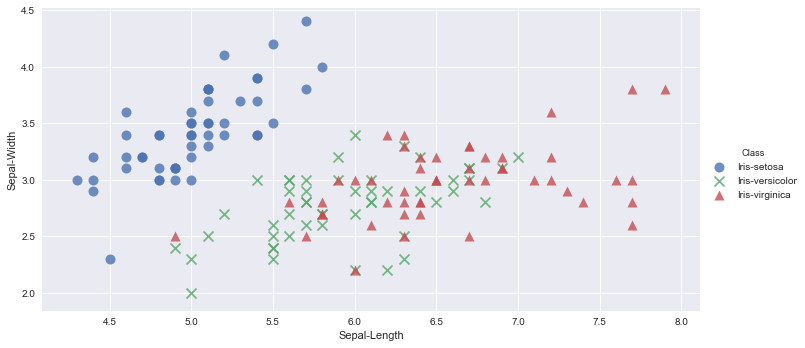

In [8]:
sns.lmplot(x='Sepal-Length', y='Sepal-Width', data=data, fit_reg=False, hue='Class', markers=["o","x","^"], aspect=2, scatter_kws={"s": 100})

Sepal length and Sepal width is not giving much help since they are overlapping. While Iris-sentosa is comfortably separated from the two, Versicolour and Virginica is not.

Let us now plot the Petal Plot.

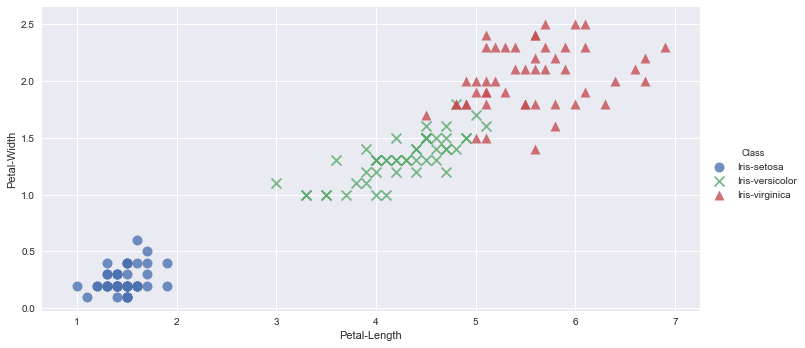

In [9]:
sns.lmplot(x='Petal-Length', y='Petal-Width', data=data, fit_reg=False, hue='Class', markers=["o","x","^"], aspect=2, scatter_kws={"s": 100})

This is better. All the three species can be separated but the Versicolour and Virginica still needs some work.

## Machine Learning Algorithms

Now we will start by importing the Sci-kit Learn's modules and try different models.

In [10]:
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn import svm #Support Vector Machines
from sklearn import metrics #Scoring of our model
from sklearn.ensemble import RandomForestClassifier #RandomForest to check the feature importances
from sklearn.neighbors import KNeighborsClassifier #K-NN
from sklearn.model_selection import train_test_split #splitting the dataset

Splitting the dataset into 30% test and 70% training set.

In [11]:
train, test = train_test_split(data, test_size=0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


Now, creating the Training Set and the Test Set

In [12]:
trainX = train[['Sepal-Length','Sepal-Width','Petal-Length','Petal-Width']]
trainY = train[['Class']].values

testX = test[['Sepal-Length','Sepal-Width','Petal-Length','Petal-Width']]
testY = test[['Class']].values

Testing the feature importances using RandomForestClassifier

In [13]:
rndF = RandomForestClassifier(n_estimators = 50, max_features='sqrt')
rndF = rndF.fit(trainX, trainY.ravel())

feat = pd.DataFrame()
feat['Feature'] = trainX.columns
feat['Importance'] = rndF.feature_importances_
feat.sort_values(by=['Importance'], ascending=True, inplace=True)
feat.set_index('Feature', inplace=True)

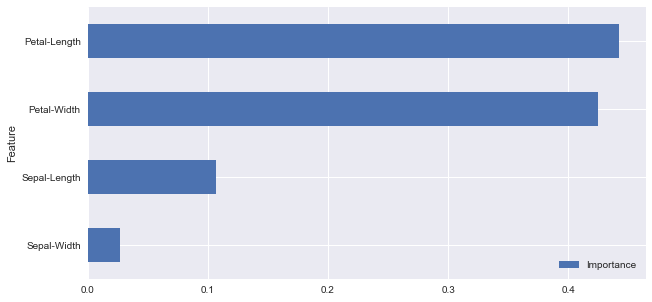

In [14]:
feat.plot(kind='barh', figsize=(10,5))

Petal length and Petal width have the most importance in the Random Forest Classification model.

### Logistic Regression

In [15]:
model = LogisticRegression()
model.fit(trainX,trainY.ravel())

predictY = model.predict(testX)

#Classification Report and Confusion Matrix
print(metrics.classification_report(testY,predictY))

print(metrics.confusion_matrix(testY,predictY))

#print the accuracy
print("\nAccuracy of the model using Logistic Regression is {0}".format(metrics.accuracy_score(testY,predictY)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.88      0.88      0.88        17

    avg / total       0.91      0.91      0.91        45

[[16  0  0]
 [ 0 10  2]
 [ 0  2 15]]

Accuracy of the model using Logistic Regression is 0.9111111111111111


### Support Vector Machine

In [16]:
model = svm.SVC()
model.fit(trainX,trainY.ravel())

predictY = model.predict(testX)

#Classification Report and Confusion Matrix
print(metrics.classification_report(testY,predictY))

print(metrics.confusion_matrix(testY,predictY))

#print the accuracy
print("\nAccuracy of the model using Support Vector Machine is {0}".format(metrics.accuracy_score(testY,predictY)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.94      0.94      0.94        17

    avg / total       0.96      0.96      0.96        45

[[16  0  0]
 [ 0 11  1]
 [ 0  1 16]]

Accuracy of the model using Support Vector Machine is 0.9555555555555556


### K Nearest Neighbour

In [17]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(trainX,trainY.ravel())

predictY = model.predict(testX)

#Classification Report and Confusion Matrix
print(metrics.classification_report(testY,predictY))

print(metrics.confusion_matrix(testY,predictY))

#print the accuracy
print("\nAccuracy of the model using K Neighbours Classifier is {0}".format(metrics.accuracy_score(testY,predictY)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.79      0.92      0.85        12
 Iris-virginica       0.93      0.82      0.87        17

    avg / total       0.92      0.91      0.91        45

[[16  0  0]
 [ 0 11  1]
 [ 0  3 14]]

Accuracy of the model using K Neighbours Classifier is 0.9111111111111111


### Random Forest Classifier

In [18]:
model = RandomForestClassifier(n_estimators = 100, max_features='sqrt')
model.fit(trainX,trainY.ravel())

predictY = model.predict(testX)

#Classification Report and Confusion Matrix
print(metrics.classification_report(testY,predictY))

print(metrics.confusion_matrix(testY,predictY))

#print the accuracy
print("\nAccuracy of the model using Random Forest Classifier is {0}".format(metrics.accuracy_score(testY,predictY)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.89      0.94      0.91        17

    avg / total       0.93      0.93      0.93        45

[[16  0  0]
 [ 0 10  2]
 [ 0  1 16]]

Accuracy of the model using Random Forest Classifier is 0.9333333333333333


## Conclusion

We have seen that out of all the models, Support Vector Machines, K-Neighbours and Random Forest gives the perfect score.
This was a beginner level dataset with no data preprocessing required.